In [5]:
# import the packages 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read in the data
df = pd.read_csv(r'C:\Users\qazws\OneDrive\文件\movies.csv')

In [49]:
# show the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980


In [48]:
#look at for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%
yearcorrect-0.0%


In [44]:
# data types for  columns
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [77]:
df['budget'] =df['budget'].astype('int64')
df['gross'] =df['gross'].astype('int64')
#create year correct cloumns
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [102]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [104]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
7480,4388,4,2,2019,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,2019
6653,2117,5,0,2015,1303,7.0,593000.0,335,2523,293,47,150000000,1670516444,1397,124.0,2015
6043,3878,5,0,2012,1899,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,2012
6646,1541,5,0,2015,165,7.1,370000.0,809,481,1785,47,190000000,1515341399,1397,137.0,2015
7494,1530,4,2,2019,2053,6.8,148000.0,277,1383,1036,47,150000000,1450026933,1422,103.0,2019


In [81]:
#drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

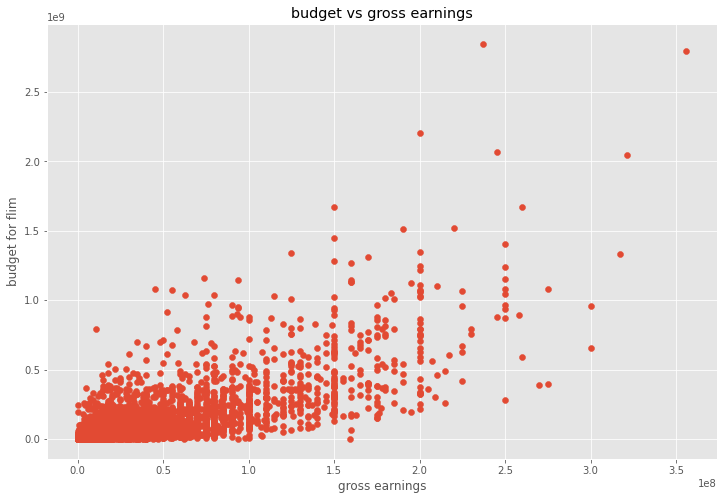

In [74]:
#Budget high correlation 
#Scatter plot with budget and gross

plt.scatter(x=df['budget'] , y=df['gross'])
plt.title('budget vs gross earnings')
plt.xlabel('gross earnings')
plt.ylabel('budget for flim')
plt.show()

In [80]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

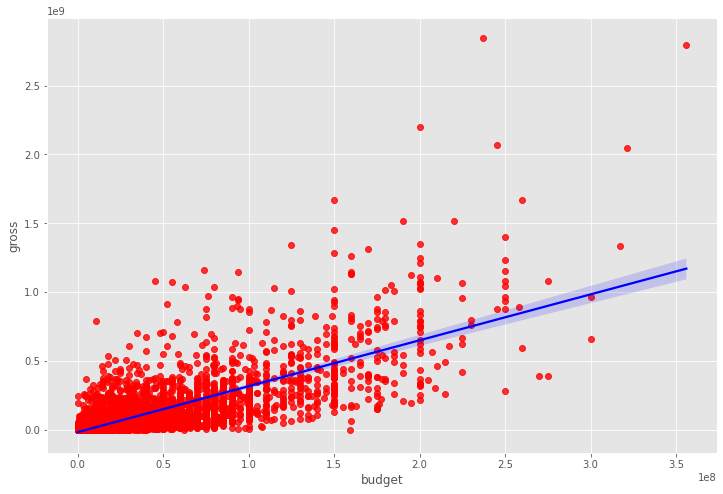

In [87]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [88]:
df.corr(method='pearson') #pearson、kendall、spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [90]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
yearcorrect,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [91]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
yearcorrect,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


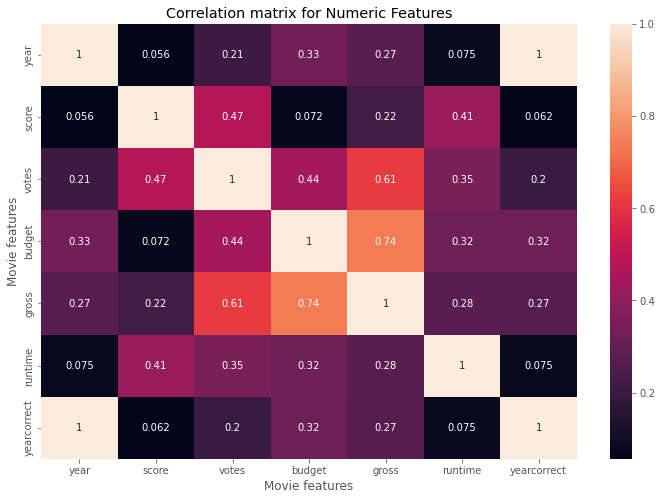

In [89]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [101]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


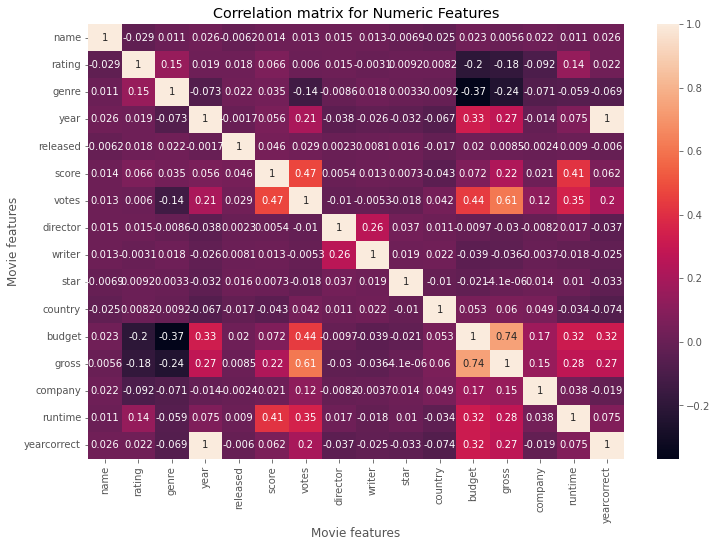

In [96]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [97]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [99]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [100]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

#gross and budget have the highest correlation to gross earnings

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64